              ^DJI
count  7306.000000
mean      0.000290
std       0.010589
min      -0.082005
25%      -0.004457
50%       0.000502
75%       0.005464
max       0.105083
^DJI   -0.016371
Name: 0.05, dtype: float64


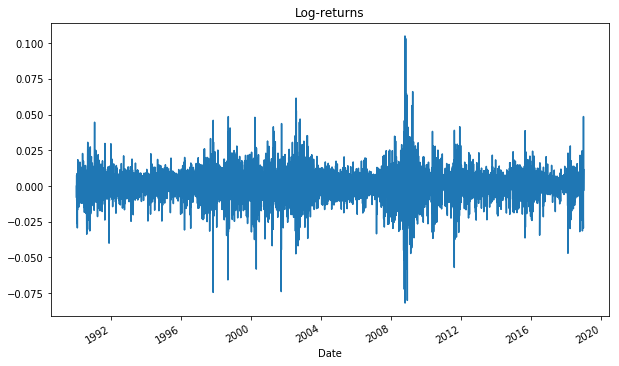

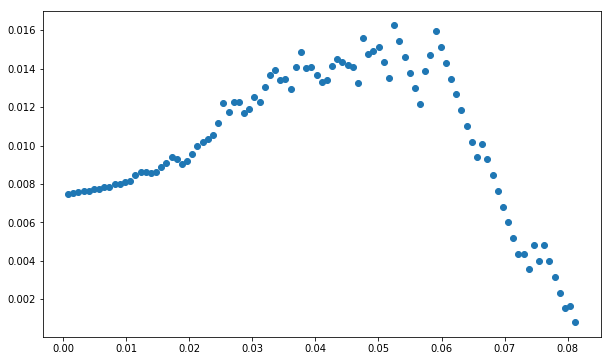

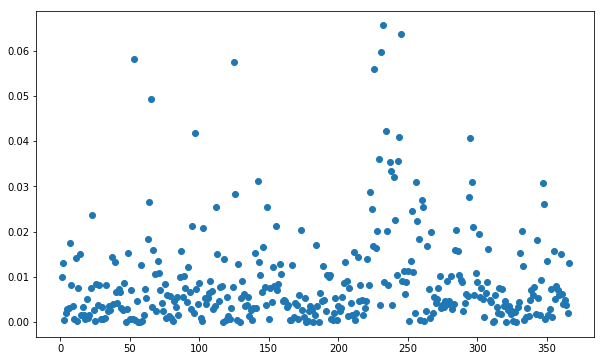

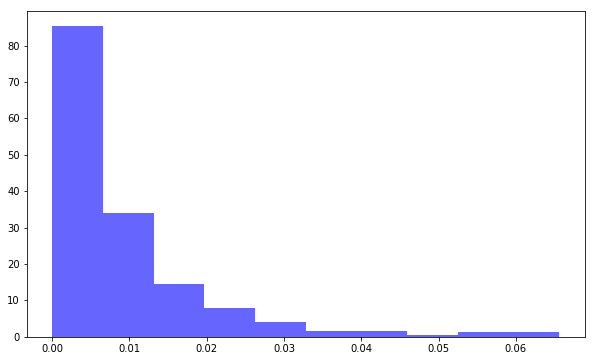

The GDP parameters: csi,mu, beta
(0.27633268767614094, 3.926322907799767e-06, 0.006874376986108387)


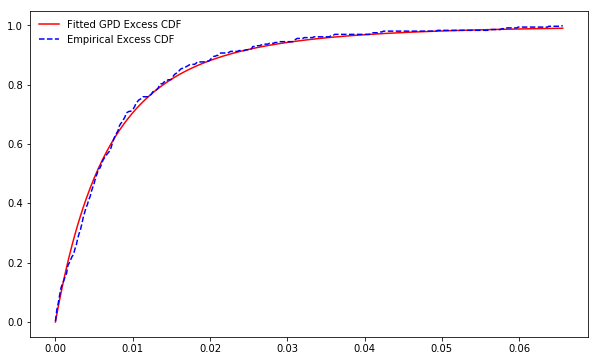

[0.83950703]
VaR GPD - alpha=0.010
^DJI    0.045062
Name: 0.05, dtype: float64
VaR  Normal- alpha=0.010
[0.02434397]
VaR Empiric- alpha=0.010
^DJI    0.029842
Name: 0.01, dtype: float64


In [62]:
#This program applies fits GPD to excess losses of stock/index

import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import genpareto as gpd
from scipy.stats import norm
# We will look at stock prices overtime
start = datetime.datetime(1990,1,1)
end = datetime.datetime(2018,12,31)
#end = datetime.date.today()

from pandas_datareader import data as wb  

ticker = '^DJI' 
df = pd.DataFrame()
df[ticker] = wb.DataReader(ticker, data_source='yahoo', start=start, end=end)['Close']
log_returns = np.log(1 + df.pct_change()).dropna()
log_returns.plot(figsize=(10, 6),legend = False, title='Log-returns');

ds=log_returns.describe()
print(ds)

q=log_returns.quantile(0.05)
print(q)

m=-log_returns.min()


mean_excess=[]
u_values=[]
for i in range (1,100):
    u=i/100*m
    x=log_returns[log_returns<-u]
    y=(x.abs()-u).dropna()
    me=y.mean()
    mean_excess.append(me)
    u_values.append(u)
    

fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(u_values, mean_excess, "o")
plt.show()
u=-q


x=log_returns[log_returns<-u]
y=(x.abs()-u).dropna()
#y=x.abs().dropna()
y=y[y>0]
y=np.array(y)


t = np.linspace(1,np.size(y),np.size(y))

fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(t, y, "o")
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
plt.hist(y, density=True, alpha=0.6,color='blue', label='Annual maximum losses')
plt.show()


fit = gpd.fit(y)
print('The GDP parameters: csi,mu, beta')
print(fit)

fig, ax = plt.subplots(figsize=(10, 6))

xs = np.sort(y)

vs=np.unique(xs)
 # create a sorted series of unique data
cdfx = np.sort(vs)
  # x-data for the ECDF: evenly spaced sequence of the uniques
x_values = np.linspace(start=min(cdfx),
stop=max(cdfx),num=len(cdfx))
    
    # size of the x_values
size_data = y.size
    # y-data for the ECDF:
y_values = []
for i in x_values:
        # all the values in raw data less than the ith value in x_values
            temp = y[y <= i]
        # fraction of that value with respect to the size of the x_values
            value = temp.size / size_data
        # pushing the value in the y_values
            y_values.append(value)
    # return both x and y values    


#plot the fit


plt.plot(x_values, gpd.cdf(x_values,*fit),color='r', label='Fitted GPD Excess CDF')
plt.plot(x_values, y_values,color='b', linestyle='--', label='Empirical Excess CDF')
ax.legend(loc='best', frameon=False)
#x.plot(t, pdf)
plt.show()

gpd_u=gpd.cdf(u,*fit)
print(gpd_u)
alpha=0.01

csi, mu, beta=gpd.fit(y)

var_alpha_GPD=u+beta/csi*((alpha/(1-gpd_u))**(-csi)-1)
print('VaR GPD - alpha=%.3f' %alpha)
print(var_alpha_GPD)

mu=log_returns.mean()
sigma=log_returns.std()

var_alpha_normal=-norm.ppf(alpha, mu, sigma)
print('VaR  Normal- alpha=%.3f' %alpha)
print(var_alpha_normal)

print('VaR Empiric- alpha=%.3f' %alpha)
var_alpha_empiric=-log_returns.quantile(alpha)
print(var_alpha_empiric)

